In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression,Lasso,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer,StandardScaler,PolynomialFeatures,FunctionTransformer,OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
from torch.utils import data
from torchvision import transforms
from tqdm.autonotebook import tqdm
import xgboost as xgb
from xgboost import plot_importance
import random,math

C:\Users\李岳\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("/test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train[["MSZoning","GarageArea","GrLivArea","SaleType","SalePrice"]].head(10)

,MSZoning,GarageArea,GrLivArea,SaleType,SalePrice
0,RL,548,1710,WD,208500
1,RL,460,1262,WD,181500
2,RL,608,1786,WD,223500
3,RL,642,1717,WD,140000
4,RL,836,2198,WD,250000
5,RL,480,1362,WD,143000
6,RL,636,1694,WD,307000
7,RL,484,2090,WD,200000
8,RM,468,1774,WD,129900
9,RL,205,1077,WD,118000


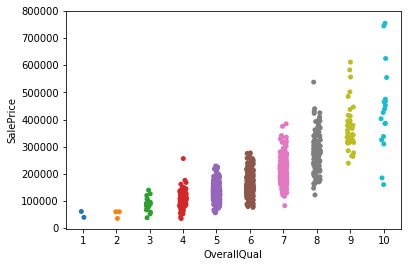

In [8]:
sns.stripplot(x="OverallQual",y="SalePrice",data=df_train)

In [9]:
print("sale price summary")
df_train["SalePrice"].describe()
# sale price is a numerical variable with positive values

sale price summary


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

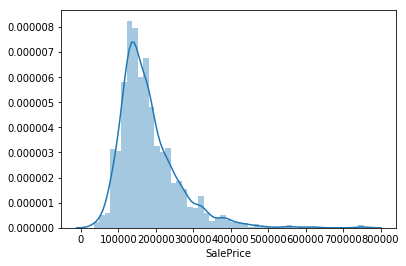

In [10]:
sns.distplot(df_train["SalePrice"],kde=True)

In [11]:
cm=sns.light_palette("green",as_cmap=True)

# Exploratory Data Analysis

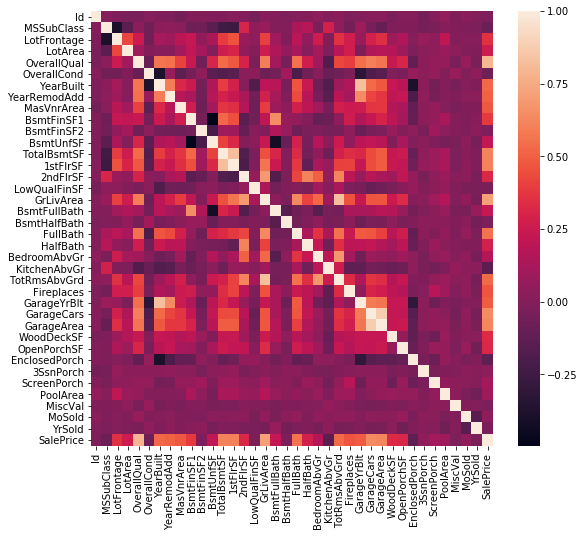

In [68]:
corr_matrix=df_train.corr() # correlation matrix
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix)

In [69]:
# select 10 variables with highest correlation with SalePrice
n_var=11
corr_matrix["SalePrice"].sort_values(ascending=False).head(n_var)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

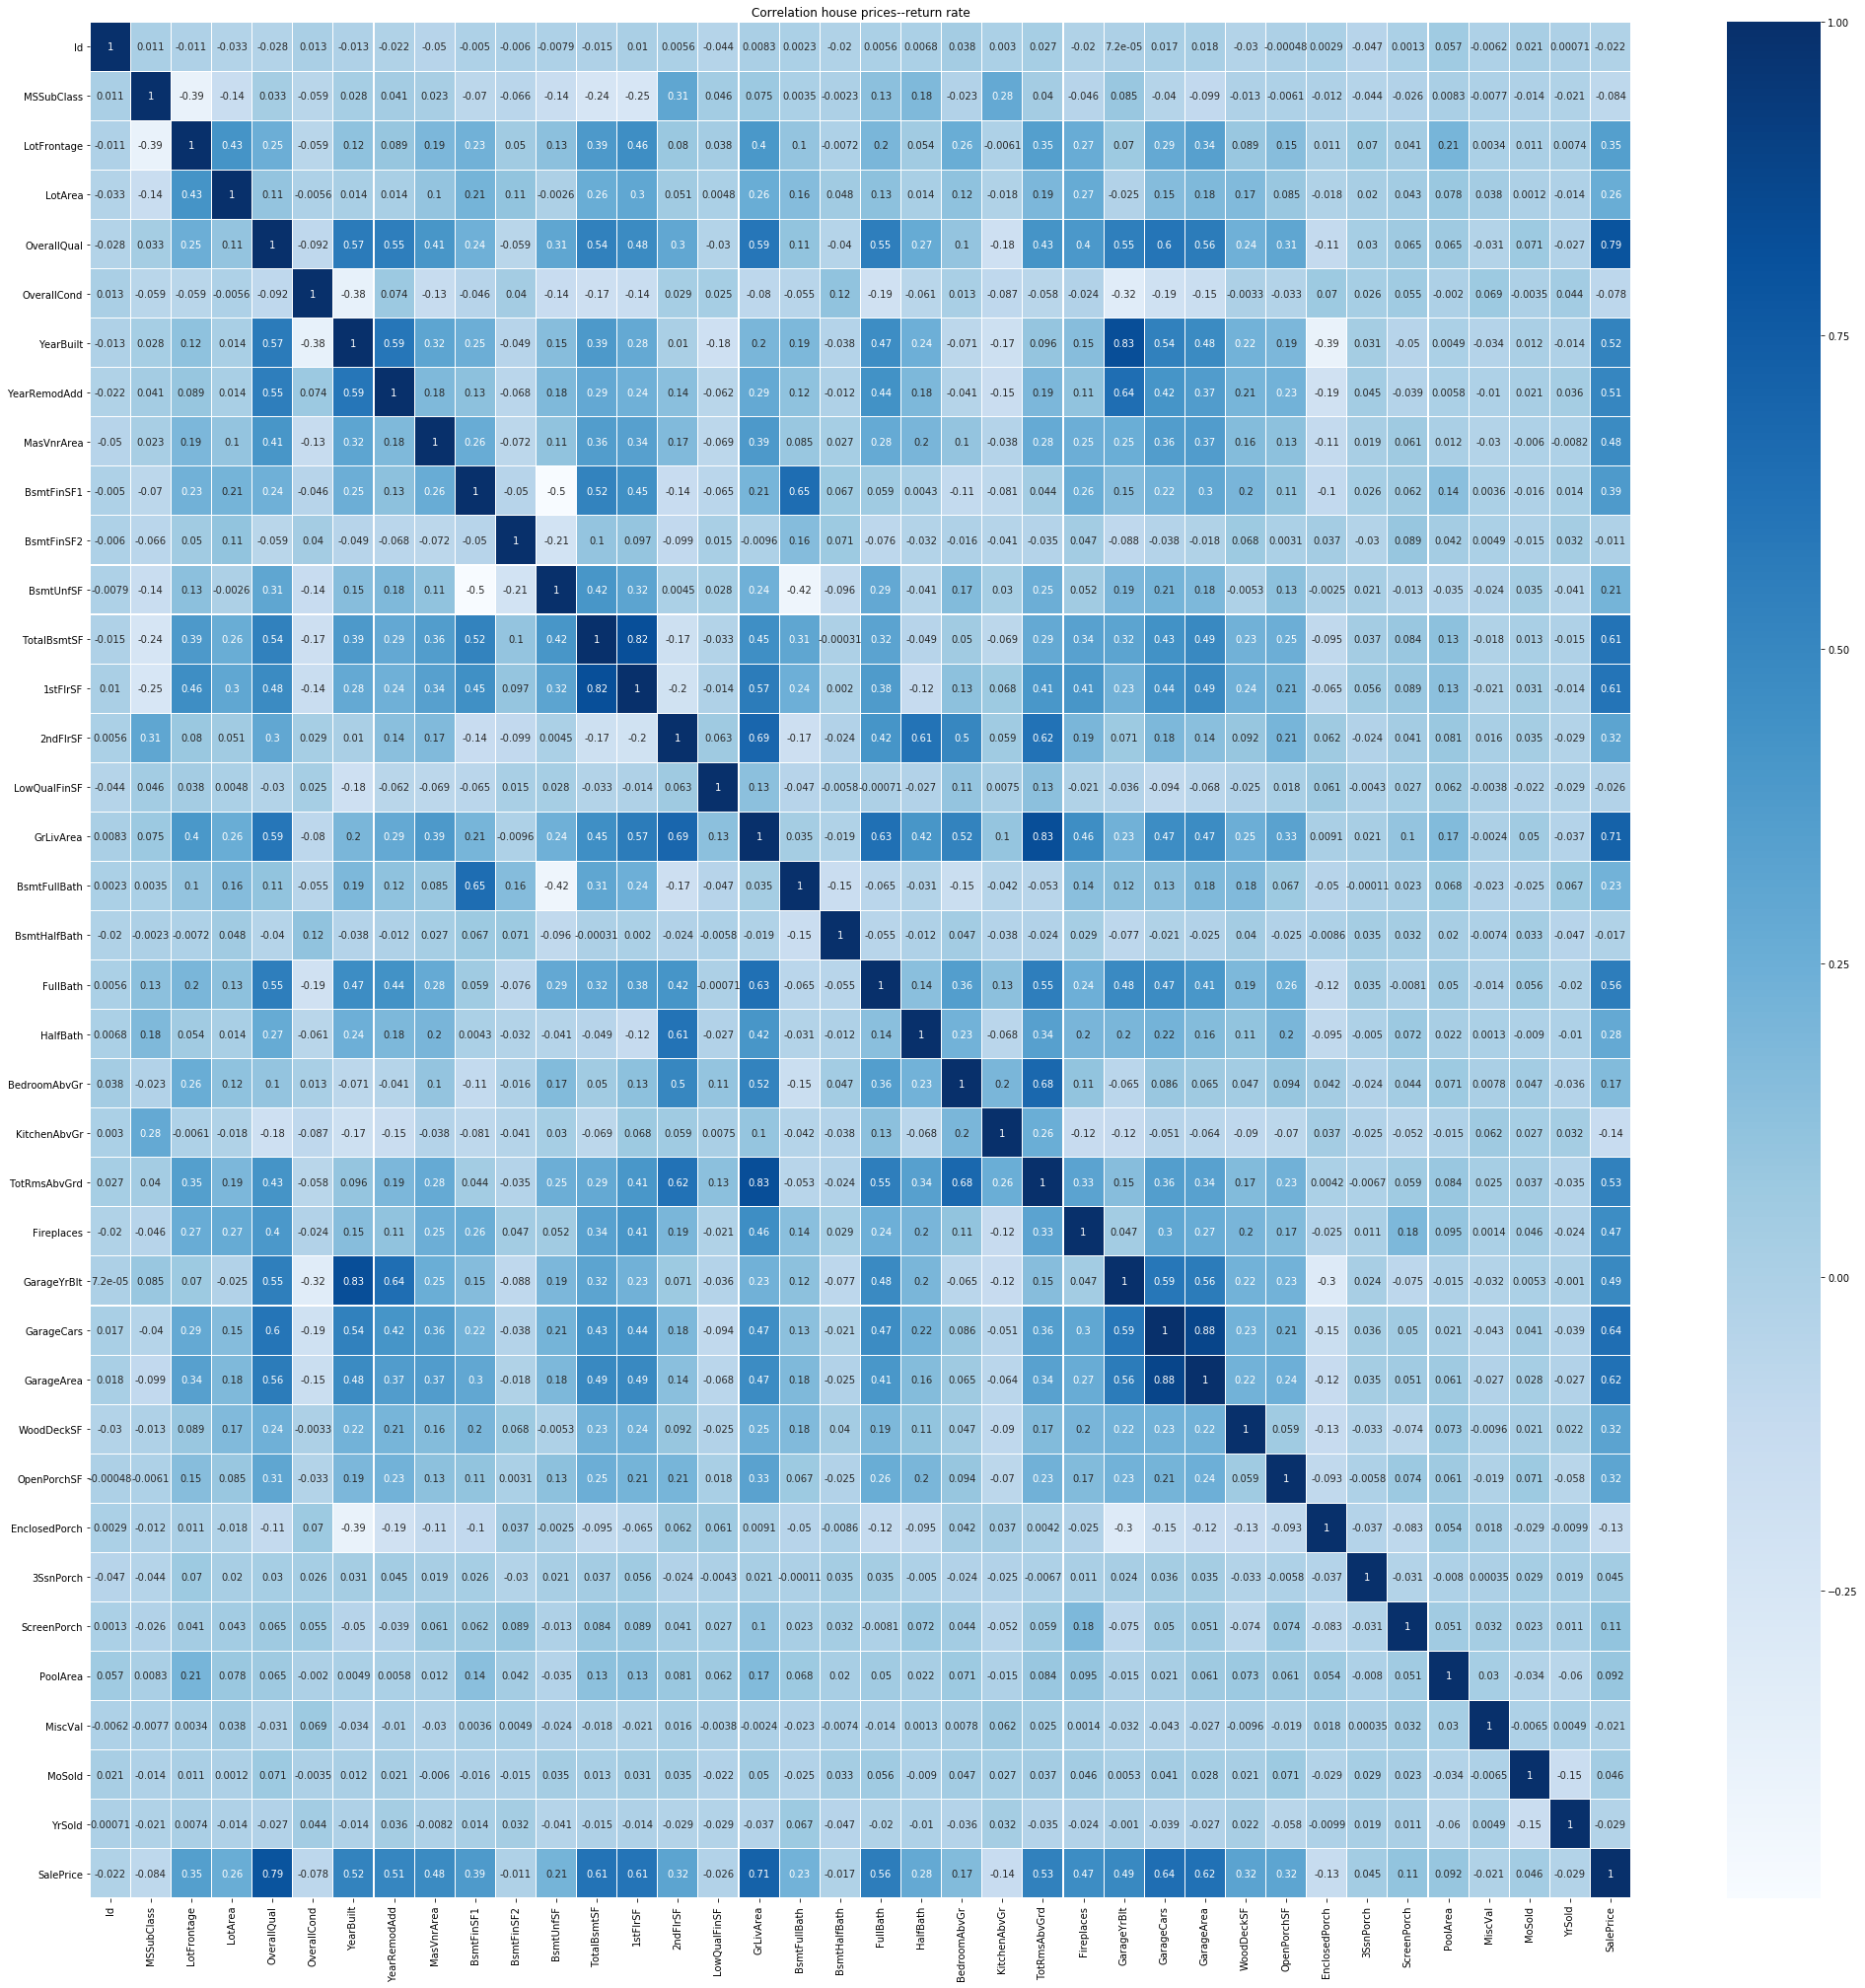

In [70]:
def get_heatmap_price(df:dict): # correlation heatmap
    corr=df.corr()
    plt.figure(figsize=(35,35))
    sns.heatmap(corr,annot=True,cmap="Blues",linewidths=0.1,annot_kws={"fontsize":10})
    plt.title("Correlation house prices--return rate")
    
get_heatmap_price(df_train)

In [71]:
pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False),columns=["count"]).style.background_gradient(cmap=cm)

,count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


Histogram Analysis 

In [72]:
def get_random_color():
    r1=lambda:random.randint(0,255)
    return "#%02X%02X%02X" % (r1(),r1(),r1())

def get_histplot_central_tendency(df:dict,fields:list):
    for field in fields:
        f,ax1=plt.subplots(1,1,figsize=(15,5))
        v_dist_1=df[field].values
        sns.barplot(v_dist_1,ax=ax1,color=get_random_color())
        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]
        ax1.axvline(mean,color="r",linestyle="--",label="Mean")
        ax1.axvline(median,color="g",linestyle="-",label="Median")
        ax1.axvline(mode,color="b",linestyle="-",label="Mode")
        ax1.legend()
        plt.title(f"{field}--Histogram Analysis")

def get_scatter(df:dict,fields:list):
    for field in fields:
        df_copy=pd.concat([df["SalePrice"],df[field]],axis=1)
        df_copy.plot.scatter(x=field,y="SalePrice",color=get_random_color())
        plt.title(f"{field}--Relationships with SalePrice")

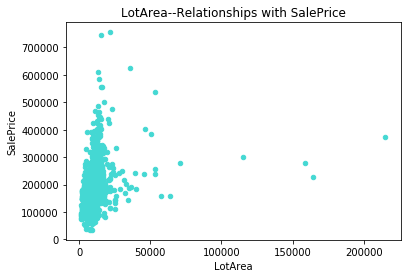

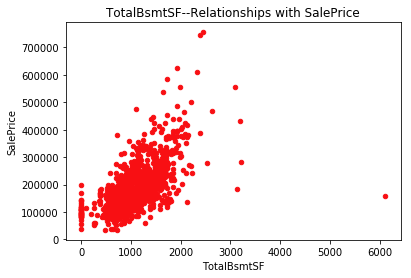

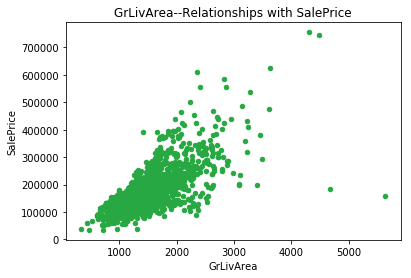

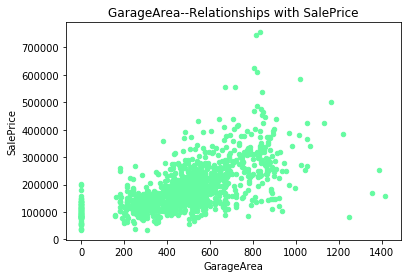

In [73]:
fields = ["LotArea","TotalBsmtSF","GrLivArea","GarageArea","SalePrice"]
get_scatter(df_train,fields[0:4])

In [74]:
def get_boxplot_price(df:dict,field:list):
    for field in fields:
        data_copy=pd.concat([df["SalePrice"],df[field]],axis=1)
        f,ax=plt.subplots(figsize=(26,6))
        fig=sns.boxplot(x=field,y="SalePrice",data=data_copy,palette="Set3")
        plt.xticks(rotation=90)
        plt.title(f"Boxplot-{field} x SalePrice")
        plt.show()

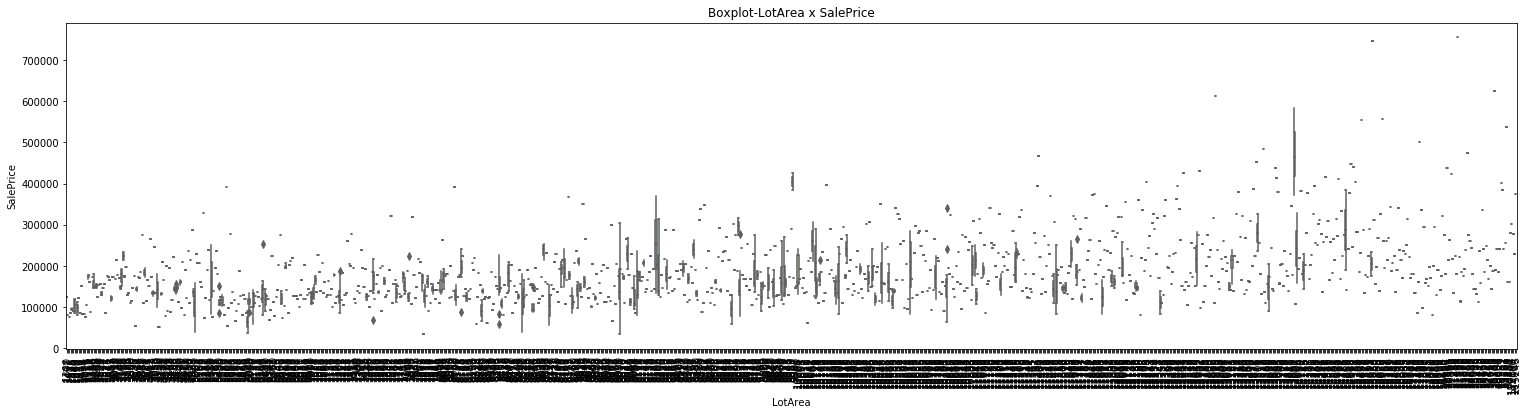

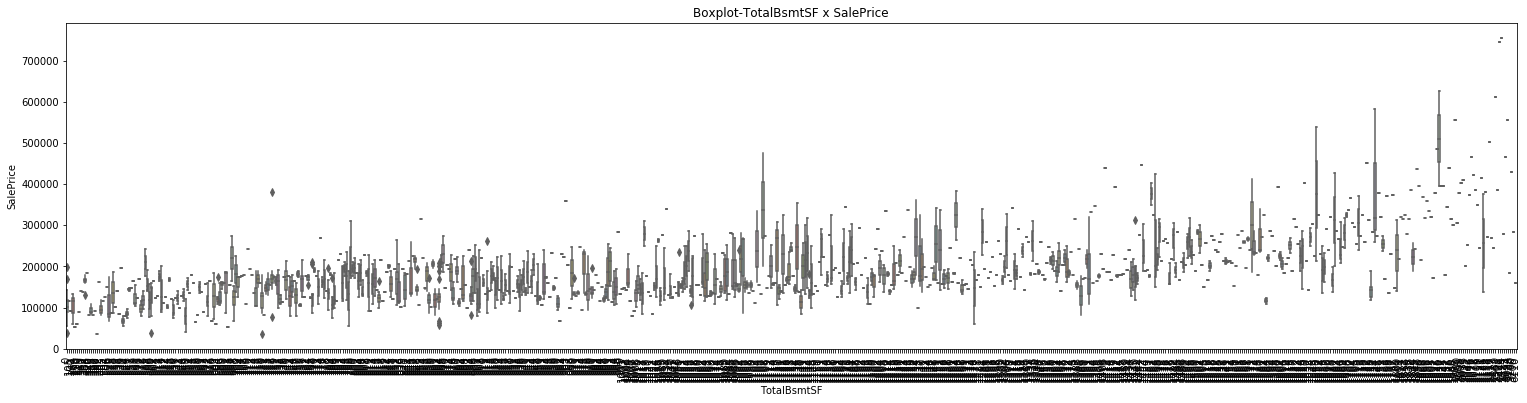

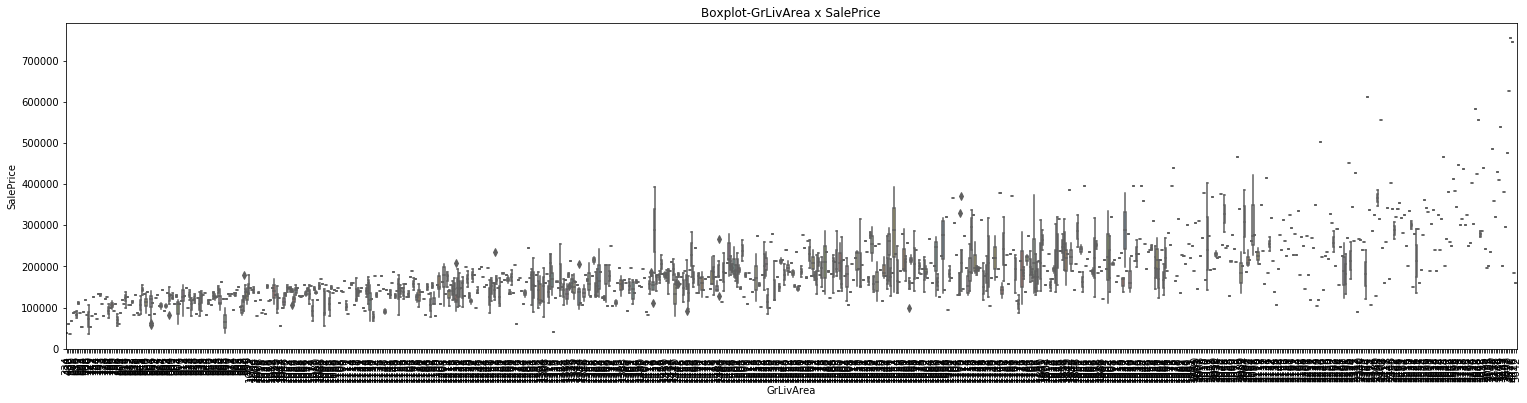

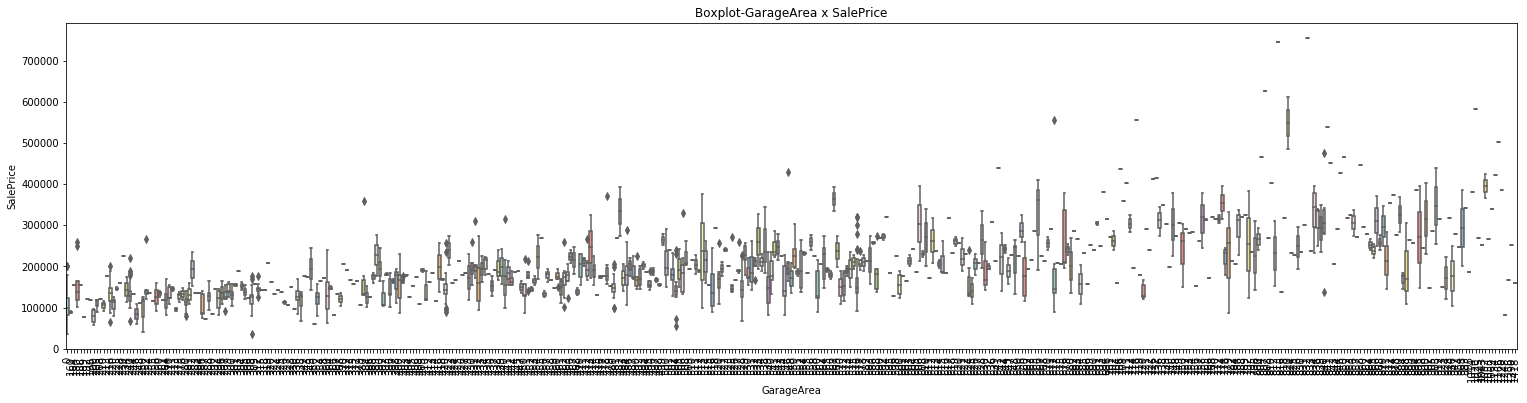

ValueError: could not broadcast input array from shape (1460,2) into shape (1460)

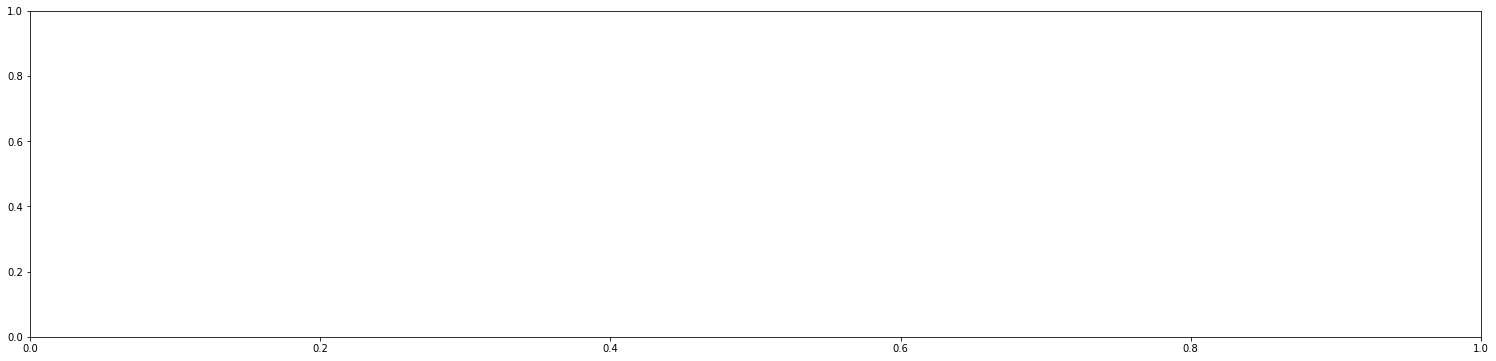

In [75]:
get_boxplot_price(df_train,["YearRemodAdd","YearBuilt"])

In [ ]:
# for these variables, find the column names and plot the correlation matrix
top_cols=corr_matrix.sort_values(by="SalePrice",ascending=False).head(n_var).index
top_corr_matrix=df_train[top_cols].corr() # correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(top_corr_matrix,annot=True,square=True)

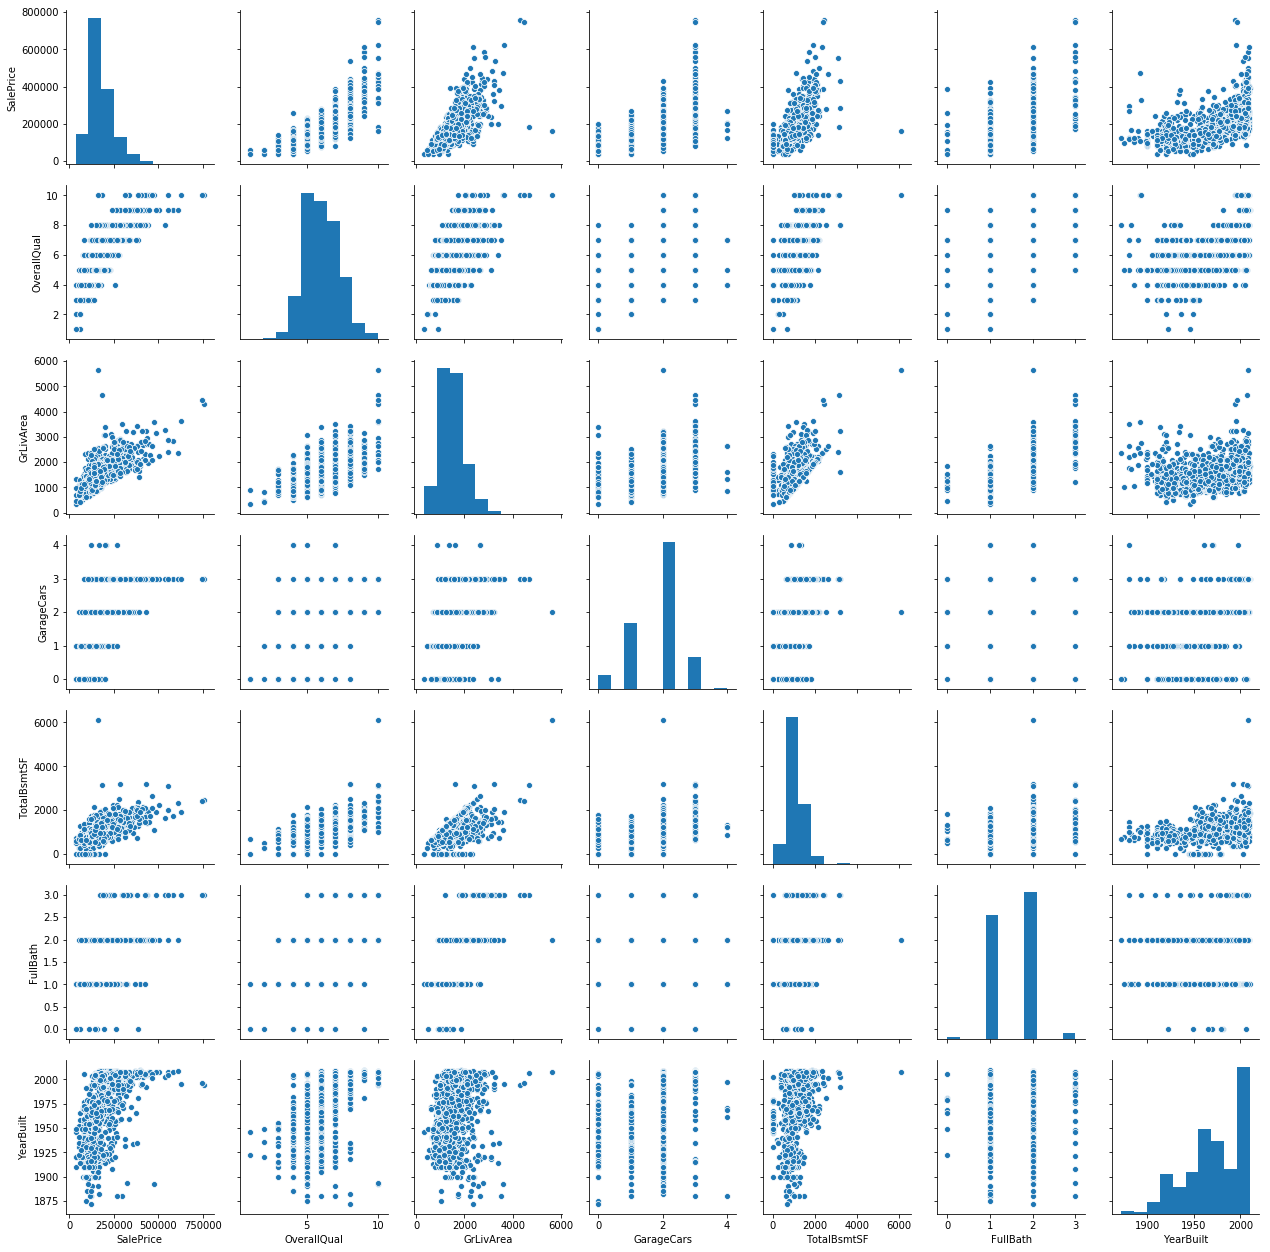

In [13]:
cols=["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","YearBuilt"]
sns.pairplot(data=df_train[cols])

missing value imputation

In [76]:
# calculate the number of missing values in each columns
df_train_miss=df_train.isnull().sum().sort_values(ascending=False).to_frame("N_MissVal")
# output types of columns (categorical/numerical)
cat_cols=df_train.select_dtypes(include=["object"]).columns
# categorical columns
df_train_miss["ValType"]=np.where(df_train_miss.index.isin(cat_cols),"Categorical","Numerical")
# output columns with missing values
df_train_miss[df_train_miss["N_MissVal"]>0]

,N_MissVal,ValType
PoolQC,1453,Categorical
MiscFeature,1406,Categorical
Alley,1369,Categorical
Fence,1179,Categorical
FireplaceQu,690,Categorical
LotFrontage,259,Numerical
GarageYrBlt,81,Numerical
GarageCond,81,Categorical
GarageType,81,Categorical
GarageFinish,81,Categorical


In [77]:
# for columns that have more than 1 missing value, drop them
missing_drops=df_train_miss[df_train_miss["N_MissVal"]>1].index
df_train=df_train.drop(missing_drops,1)
# "Electrical" column has only 1 missing value, drop the corresponding row
row_ind=df_train.loc[df_train["Electrical"].isnull()].index
df_train=df_train.drop(row_ind)

# check if there is any missing values left
print("Remaining missing values:{}".format(df_train.isnull().sum().sum()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Remaining missing values:0


In [78]:
print("shape of dataframe before dummies:{}".format(df_train.shape))

shape of dataframe before dummies:(1459, 63)


In [79]:
df_train=pd.get_dummies(df_train)
print("shape of dataframe after dummies:{}".format(df_train.shape))

shape of dataframe after dummies:(1459, 222)


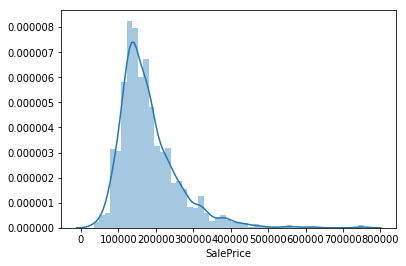

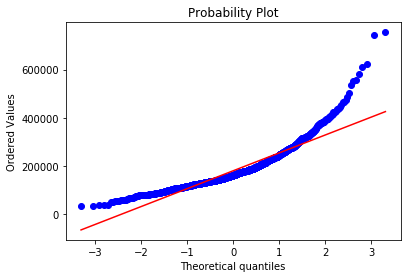

In [80]:
df_train["SalesPrice"]=np.log(df_train["SalePrice"])
sns.distplot(df_train["SalePrice"],kde=True)
fig=plt.figure()
res=stats.probplot(df_train["SalePrice"],plot=plt)

Modeling--Linear Regression

In [81]:
X=df_train.drop(["SalePrice","Id"],1)
y=df_train[["SalePrice"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [82]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

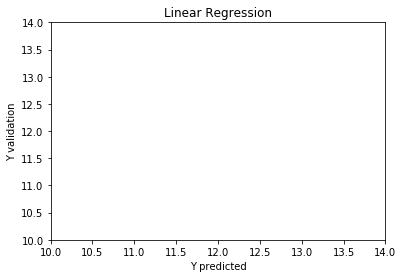

In [83]:
y_pred=regressor.predict(X_test)
plt.scatter(y_pred,y_test)
plt.title("Linear Regression")
plt.xlabel("Y predicted")
plt.ylabel("Y validation")
plt.xlim([10,14])
plt.ylim([10,14])
plt.show() 

In [84]:
rmse=np.sqrt(-cross_val_score(regressor,X_test,y_test,scoring="neg_mean_squared_error",cv=5).mean())
print("RMSE:{}".format(rmse))

RMSE:32532.857397125008


Predicting Test Dataset

In [85]:
df_test=df_test.drop(missing_drops,1) # drop same columns as train dataset

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [86]:
df_test_miss=df_test.isnull().sum().sort_values(ascending=False).to_frame("N_MissVal")
df_test_miss[df_test_miss["N_MissVal"]>0]

,N_MissVal
MSZoning,4
Functional,2
BsmtFullBath,2
BsmtHalfBath,2
Utilities,2
BsmtUnfSF,1
BsmtFinSF2,1
Exterior2nd,1
GarageCars,1
GarageArea,1


In [87]:
# for numerical variables,fill them with median (missing values)
df_test=df_test.fillna(df_test.median())
# for categorical variables,fill them with most occuring classes
df_test=df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
print("remaining missing values:{}".format(df_test.isnull().sum().sum()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


remaining missing values:0


In [88]:
# get dummies
df_test=pd.get_dummies(df_test)
print("shape of train dataframe after dummies:{}".format(df_train.shape))
print("shape of test dataframe after dummies:{}".format(df_test.shape))

shape of train dataframe after dummies:(1459, 223)
shape of test dataframe after dummies:(1459, 206)


In [89]:
miss_columns=list(set(df_train.columns)-set(df_test.columns))
miss_columns

['RoofMatl_ClyTile',
 'Condition2_RRAn',
 'SalePrice',
 'Heating_Floor',
 'RoofMatl_Metal',
 'RoofMatl_Membran',
 'RoofMatl_Roll',
 'Utilities_NoSeWa',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Exterior1st_ImStucc',
 'HouseStyle_2.5Fin',
 'Electrical_Mix',
 'Condition2_RRAe',
 'Heating_OthW',
 'SalesPrice',
 'Condition2_RRNn']

In [90]:
df_test[miss_columns]=0
df_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Utilities_NoSeWa,Exterior1st_Stone,Exterior2nd_Other,Exterior1st_ImStucc,HouseStyle_2.5Fin,Electrical_Mix,Condition2_RRAe,Heating_OthW,SalesPrice,Condition2_RRNn
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df_test=df_test[df_train.columns]
df_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalesPrice
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,1,0,0,0,0,1,0,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,1,0,0,0,0,1,0,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,1,0,0,0,0,1,0,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,1,0,0,0,0,1,0,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,1,0,0,0,0,1,0,0


In [92]:
X_to_predict=df_test.drop(["SalePrice","Id"],1)
y_to_predict=regressor.predict(X_to_predict)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [93]:
result=pd.DataFrame({"Id":df_test.Id})
result["SalePrice"]=y_to_predict
result.nlargest(5,"SalePrice")

,Id,SalePrice
133,1594,9.013994e+07
675,2136,2.689188e+07
1089,2550,-1.678245e+06
756,2217,-1.697801e+06
514,1975,-1.700273e+06


In [94]:
result.loc[133,"SalePrice"]=1*result.loc[1089,"SalePrice"]
result.nlargest(2,"SalePrice")

,Id,SalePrice
675,2136,2.689188e+07
133,1594,-1.678245e+06


# Random Forest

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

Data Cleaning-- fill out missing value

In [13]:
for col in df_train.columns:
    if df_train[col].isnull().sum()>0:
        print("%s has %d null values" %(col,df_train[col].isnull().sum()))

LotFrontage has 259 null values
Alley has 1369 null values
MasVnrType has 8 null values
MasVnrArea has 8 null values
BsmtQual has 37 null values
BsmtCond has 37 null values
BsmtExposure has 38 null values
BsmtFinType1 has 37 null values
BsmtFinType2 has 38 null values
Electrical has 1 null values
FireplaceQu has 690 null values
GarageType has 81 null values
GarageYrBlt has 81 null values
GarageFinish has 81 null values
GarageQual has 81 null values
GarageCond has 81 null values
PoolQC has 1453 null values
Fence has 1179 null values
MiscFeature has 1406 null values


In [15]:
more_than_1000=["Alley","PoolQC","Fence","MiscFeature"]
df_train.drop(more_than_1000,axis=1,inplace=True)
df_test.drop(more_than_1000,axis=1,inplace=True)

In [16]:
df_train[df_train["GarageType"].isna()][["GarageYrBlt","GarageFinish","GarageQual","GarageCond"]].isna().sum()

GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [18]:
garage=["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]
for g in garage:
    df_train[g]=df_train[g].fillna("NA")
    df_test[g]=df_test[g].fillna("NA")
df_train["GarageYrBlt"]=df_train["GarageYrBlt"].astype(str)
df_test["GarageYrBlt"]=df_test["GarageYrBlt"].astype(str)

In [21]:
df_train.corr()["LotFrontage"].sort_values(ascending=False)[1:5]

1stFlrSF       0.457181
LotArea        0.426095
GrLivArea      0.402797
TotalBsmtSF    0.392075
Name: LotFrontage, dtype: float64

In [25]:
df_train['MasVnrType']= df_train['MasVnrType'].fillna('None')
df_train['MasVnrArea']= df_train['MasVnrArea'].fillna(0)
df_test['MasVnrType']=df_test['MasVnrType'].fillna('None')
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(0)
df_train['Electrical']=df_train['Electrical'].fillna('Mix')
df_test['Electrical']=df_test['Electrical'].fillna('Mix')

df_train[df_train['BsmtQual'].isnull()][['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isna().sum()

BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
dtype: int64

In [26]:
for c in range(len(df_train.columns)):
    if "Bsmt" in df_train.columns[c]:
        print("%s-->%d" %(df_train.columns[c],c))

BsmtQual-->29
BsmtCond-->30
BsmtExposure-->31
BsmtFinType1-->32
BsmtFinSF1-->33
BsmtFinType2-->34
BsmtFinSF2-->35
BsmtUnfSF-->36
TotalBsmtSF-->37
BsmtFullBath-->46
BsmtHalfBath-->47


In [27]:
df_train[~(df_train['BsmtQual'].isnull())&(df_train['BsmtExposure'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2006,WD,Normal,192500


In [30]:
df_train.iat[948,31]='No'
df_train[~(df_train['BsmtQual'].isnull())&(df_train['BsmtFinType2'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,284000


In [34]:
df_train.iat[332,34]='Unf'
basement=["Qual","Cond","Exposure","FinType1","FinType2"]
for b in basement:
    df_train["Bsmt"+b]=df_train["Bsmt"+b].fillna("NA")
    df_test["Bsmt"+b]=df_test["Bsmt"+b].fillna("NA")
    
df_test.isna().sum()[df_test.isna().sum()>0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

In [35]:
df_test["MSZoning"]=df_test["MSZoning"].fillna(df_test["MSZoning"].mode())
df_test['Utilities']=df_test['Utilities'].fillna('AllPub')
df_test['Exterior1st']=df_test['Exterior1st'].fillna("VinylSd")
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna("VinylSd")

In [37]:
df_test[df_test['BsmtFinSF1'].isna()][['BsmtUnfSF','BsmtFinSF2','TotalBsmtSF','BsmtCond','BsmtFullBath']]

,BsmtUnfSF,BsmtFinSF2,TotalBsmtSF,BsmtCond,BsmtFullBath
660,NaN,NaN,NaN,NA,NaN


In [38]:
df_test[df_test['BsmtFullBath'].isna()].iloc[:,45:47].index

Int64Index([660, 728], dtype='int64')

In [39]:
df_test.at[2189,'BsmtHalfBath'] = 0
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(0)
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(0)
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(0)
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(0)
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(0)
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(0)

In [40]:
df_test['KitchenQual']=df_test['KitchenQual'].fillna(df_train['KitchenQual'].mode().loc[0])
df_test['Functional']=df_test['Functional'].fillna(df_train['Functional'].mode().loc[0])
df_test['GarageCars']=df_test['GarageCars'].fillna(df_train['GarageCars'].mode().loc[0])
df_test['GarageArea']=df_test['GarageArea'].fillna(df_train['GarageArea'].mean())
df_test['SaleType']=df_test['SaleType'].fillna(df_train['SaleType'].mode().loc[0])

In [45]:
cols=['1stFlrSF','LotArea','GrLivArea','TotalBsmtSF','LotFrontage']
df_lotfrontage=df_train[cols].copy()
df_lotfrontage_null=df_lotfrontage[df_lotfrontage["LotFrontage"].isnull()].copy()
df_lotfrontage.dropna(inplace=True)
X=df_lotfrontage.drop("LotFrontage",axis=1)
y=df_lotfrontage["LotFrontage"]
sc=StandardScaler()
X_sc=sc.fit_transform(X)
lr=LinearRegression()
lr.fit(X_sc,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
X_test=df_lotfrontage_null.drop("LotFrontage",axis=1)
fill_null=np.round(lr.predict(sc.transform(X_test)),2)
df_lotfrontage_null["LotFrontage"]=fill_null
df_lotfrontage=pd.concat([df_lotfrontage,df_lotfrontage_null],axis=0)
df_train["LotFrontage"]=df_lotfrontage["LotFrontage"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [82]:
# regressor=RandomForestRegressor(n_estimators=10,random_state=0)
# regressor.fit(X_train,y_train.values.ravel())

In [83]:
# rmse=np.sqrt(-cross_val_score(regressor,X_test,y_test.values.ravel(),scoring="neg_mean_squared_error",cv=5)).mean()
# print("RMSE:{}".format(rmse))

In [49]:
lotfrontage_test=df_test[cols].copy()
null_lotfrontage_test=lotfrontage_test[lotfrontage_test["LotFrontage"].isnull()].copy()
lotfrontage_test.dropna(inplace=True)
X=lotfrontage_test.drop("LotFrontage",axis=1)
y=lotfrontage_test["LotFrontage"]
X_sc=sc.transform(X)
X_test=null_lotfrontage_test.drop("LotFrontage",axis=1)
# fill_null=np.round(lr.predict(sc.transform(X_test)),2)
# null_lotfrontage_test["LotFrontage"]=fill_null
# lotfrontage_test=pd.concat([lotfrontage_test,null_lotfrontage_test],axis=0)
# df_test["LotFrontage"]=lotfrontage_test["LotFrontage"]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [51]:
lr.predict(sc.transform(X_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

EDA for Random Forest

# Feature Engineering

In [58]:
usefull_cols=['OverallQual','GrLivArea','GarageArea', 'TotalBsmtSF'
                , 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
                ,'LotFrontage','WoodDeckSF','OpenPorchSF'
                ,'ExterQual','KitchenQual','Neighborhood','MSZoning'
                ,'Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition']
# df_train.column
# Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
#       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
#       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
#       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
#       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
#       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
#       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
#       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
#       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
#       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
#       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
#       'SaleCondition', 'SalePrice'],
#      dtype='object')

In [59]:
df_train_prepro=df_train[usefull_cols].copy()
df_test_prepro=df_train[usefull_cols].copy()
print("train data====")
display(df_train_prepro.isnull().sum())
print("test data====")
display(df_test_prepro.isnull().sum())

train data====


OverallQual         0
GrLivArea           0
GarageArea          0
TotalBsmtSF         0
FullBath            0
YearBuilt           0
YearRemodAdd        0
Fireplaces          0
LotFrontage       259
WoodDeckSF          0
OpenPorchSF         0
ExterQual           0
KitchenQual         0
Neighborhood        0
MSZoning            0
Alley            1369
LotShape            0
LandContour         0
Condition1          0
HouseStyle          0
MasVnrType          8
SaleCondition       0
dtype: int64

test data====


OverallQual         0
GrLivArea           0
GarageArea          0
TotalBsmtSF         0
FullBath            0
YearBuilt           0
YearRemodAdd        0
Fireplaces          0
LotFrontage       259
WoodDeckSF          0
OpenPorchSF         0
ExterQual           0
KitchenQual         0
Neighborhood        0
MSZoning            0
Alley            1369
LotShape            0
LandContour         0
Condition1          0
HouseStyle          0
MasVnrType          8
SaleCondition       0
dtype: int64

In [60]:
df_test_prepro["GarageArea"]=df_test_prepro["GarageArea"].fillna(df_test_prepro["GarageArea"].mean())
df_test_prepro["TotalBsmtSF"]=df_test_prepro["TotalBsmtSF"].fillna(df_test_prepro["TotalBsmtSF"].mean())
df_train_prepro["LotFrontage"]=df_train_prepro["LotFrontage"].fillna(0)
df_test_prepro["LotFrontage"]=df_test_prepro["LotFrontage"].fillna(0)
df_test_prepro["KitchenQual"]=df_test_prepro["KitchenQual"].fillna(0)

Quantitative Values

In [61]:
for col in ["GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF"]: # yeo-Johnson
    pt=PowerTransformer(method="yeo-johnson")
    pt.fit(df_train_prepro[[col]].values)
    df_test_prepro[col]=pt.transform(df_test_prepro[[col]].values)
    df_train_prepro[col]=pt.transform(df_train_prepro[[col]].values)
    
for col in ["TotalBsmtSF","LotFrontage"]: # Standard Scalar
    sc=StandardScaler()
    sc.fit(df_train_prepro[[col]].values)
    df_test_prepro[col]=sc.transform(df_test_prepro[[col]].values)
    df_train_prepro[col]=sc.transform(df_train_prepro[[col]].values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [62]:
# Create YearRemodAdd-YearBuilt flag columns
df_train_prepro["YearRemodAdd-YearBuilt"]=df_train_prepro["YearRemodAdd"]-df_train_prepro["YearBuilt"]
df_test_prepro["YearRemodAdd-YearBuilt"]=df_test_prepro["YearRemodAdd"]-df_test_prepro["YearBuilt"]
df_train_prepro=df_train_prepro.drop(columns=["YearRemodAdd"])
df_test_prepro=df_test_prepro.drop(columns=["YearRemodAdd"])

Quanlitative Values

In [63]:
for col in ["ExterQual","KitchenQual"]: # ordinal values
    df_train_prepro=df_train_prepro.replace({col:{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}})
    df_test_prepro=df_test_prepro.replace({col:{"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}})

# one-hot encoding
df_train_prepro = pd.get_dummies(df_train_prepro,columns=['Neighborhood','MSZoning','Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition'])
df_test_prepro = pd.get_dummies(df_test_prepro,columns=['Neighborhood','MSZoning','Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition'])

# transform dataframe to ndarray
x_train=df_train_prepro.values
y_train=np.log(df_train[["SalePrice"]].values)
x_test=df_test_prepro.values

# transform ndarray to tensors
x_train_tensor=torch.tensor(x_train).float()
y_train_tensor=torch.tensor(y_train).float() 
x_test_tensor=torch.tensor(x_test).float()

In [19]:
# df_train.column
# Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
#       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
#       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
#       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
#       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
#       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
#       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
#       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
#       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
#       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
#       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
#       'SaleCondition', 'SalePrice'],
#      dtype='object')

Contrast Regression Model with PyTorch

In [65]:
n_input=x_train_tensor.shape[1] # set input dimension
n_hidden=32 # set hidden dimension
n_output=1 # set output dimension

In [66]:
class Net(nn.Module):
    
    def __init__(self,n_input,n_output,n_hidden):
        super().__init__()
        
        self.l1=nn.Linear(n_input,n_hidden)
        self.l2=nn.Linear(n_hidden,n_output)
        self.relu=nn.ReLU(inplace=True)
        self.features=nn.Sequential(self.l1,self.relu,self.l2)
    
    def forward(self,x):
        x1=self.features(x)
        return x1

In [67]:
net=Net(n_input,n_output,n_hidden)
net

Net(
  (l1): Linear(in_features=80, out_features=32, bias=True)
  (l2): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU(inplace=True)
  (features): Sequential(
    (0): Linear(in_features=80, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)

learning

In [68]:
torch.manual_seed(20220214)
torch.cuda.manual_seed(20220214)
torch.backends.cudnn.deterministic=True
torch.use_deterministic_algorithms=True

In [69]:
# setting GPU
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net=net.to(device)
x_train_tensor=x_train_tensor.to(device)
y_train_tensor=y_train_tensor.to(device)
x_test_tensor=x_test_tensor.to(device)

In [70]:
# creating mini-batch data
train_tensor=data.TensorDataset(x_train_tensor,y_train_tensor)
batch_size=1500
train_loader=DataLoader(train_tensor,batch_size=batch_size,shuffle=True)

In [75]:
len(learn_process)

0

In [72]:
# iteration
learning_rate=0.1
net=Net(n_input,n_output,n_hidden).to(device) # initialize instance
criterion=nn.MSELoss() # set loss function
optimizer=optim.Adam(net.parameters(),lr=learning_rate) # set optimizer
num_epochs=500 # set epochs
learn_process=np.zeros((0,2)) # create array to save learning process

for epoch in range(num_epochs):
    train_loss=0
    for x,y in tqdm(train_loader):
        
        # transfer data to GPU
        x=x.to(device)
        y=y.to(device)
        
        optimizer.zero_grad() # initialize grad
        
        y_pred=net(x) # predict in training data
        
        loss=torch.sqrt(criterion(y_pred,y)) # RMSE
        
        loss.backward() # calculate grad
        
        optimizer.step() # modify parameters
        
    learn_process=np.stack((learn_process,np.array([epoch,loss.item()])))
    print(f"Epoch {epoch} loss:{loss.item():.5f}")

ValueError: all input arrays must have the same shape

# XGBoost Regression

In [110]:
features=df_train.columns
features=list(features[1:len(features)-1])
len(features)

221

In [111]:
y=df_train["SalePrice"]
X=df_train[features]
model=xgb.XGBRegressor(n_estimators=1000,max_depth=10,eta=0.1,subsample=0.7,colsample_bytree=0.8)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
XGB_model=model.fit(X_train,y_train)
XGB_model.score(X_test,y_test)

0.9863163179913342

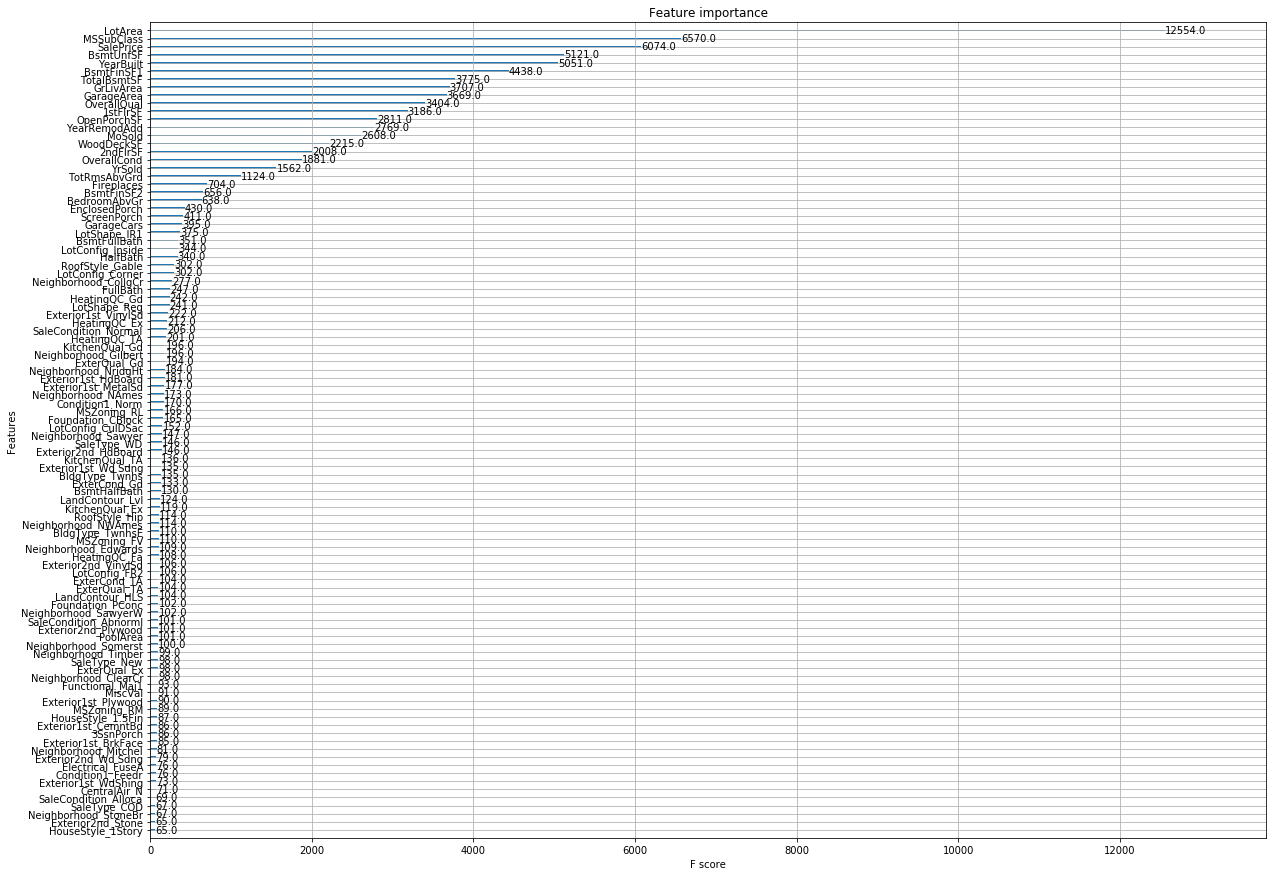

In [112]:
plt.rcParams["figure.figsize"]=(20,15)
plot_importance(XGB_model,max_num_features=100)
plt.show()

XGBoost Model Evaluation

In [113]:
def get_plot_predict(y,y_pred):
    plt.figure(figsize=(15,5))
    ax1=sns.distplot(y,hist=False,color="orange",label="real value")
    ax2=sns.distplot(y_pred,hist=False,color="blue",label="predict value",ax=ax1)
    plt.title("Real Salesprice X predict")
    plt.xlabel("SalesPrice")
    plt.gca().legend()
    plt.grid()
    plt.show() 

train dataset:
r2:1.0 squared_error:0.06


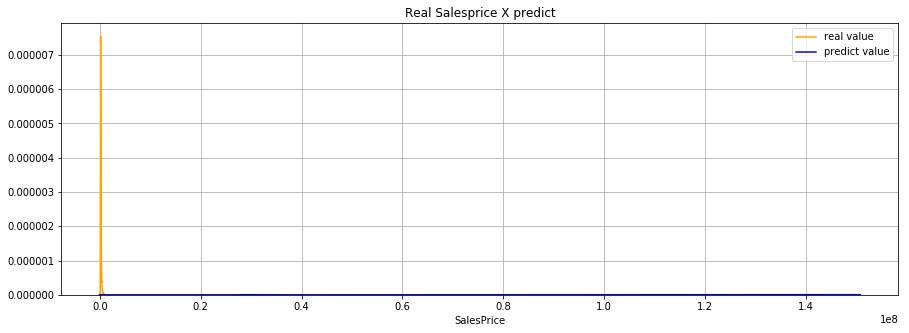

test dataset:
r2:0.99 squared_error:8597.3


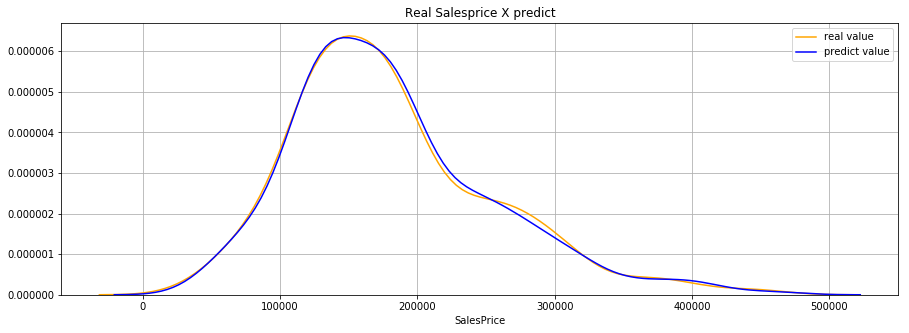

In [114]:
train_predict=XGB_model.predict(X_train)
test_predict=XGB_model.predict(X_test)

r2_train=r2_score(y_train,train_predict)
squares_error_train=np.sqrt(mean_squared_error(y_train,train_predict))

r2_test=r2_score(y_test,test_predict)
squares_error_test=np.sqrt(mean_squared_error(y_test,test_predict))

print("train dataset:")
print(f"r2:{round(r2_train,2)} squared_error:{round(squares_error_train,2)}")
get_plot_predict(y_train,y_pred)

print("test dataset:")
print(f"r2:{round(r2_test,2)} squared_error:{round(squares_error_test,2)}")
get_plot_predict(y_test,test_predict)

# LightGBM

# LASSO

In [12]:
# check feature skewness
numeric_features=df_train.dtypes[df_train.dtypes!="object"].index
skewed_features=df_train[numeric_features].apply(lambda x:skew(x)).sort_values(ascending=False)
skewed_features

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
G

In [13]:
def fix_skewness(df,num_col): # input: dataframe, output: fixed skewed dataframe
    numeric_features=df.dtypes[num_col].index # getting all the data that are not of 'object' type
    skewed_features=df[numeric_features].apply(lambda x:skew(x)).sort_values(ascending=False) # check the skew of all numeric features
    high_skew=skewed_features[abs(skewed_features)>0.5]
    skewed_features=high_skew.index
    for feature in skewed_features:
        df[feature]=boxcox1p(df[feature],boxcox_normmax(df[feature]+1))

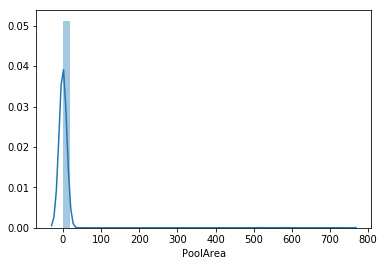

In [14]:
sns.distplot(df_train["PoolArea"])

In [15]:
all_df=pd.concat([df_train,df_test])
all_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [18]:
all_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       '

In [21]:
all_df["MSSubClass"]=all_df["MSSubClass"].apply(str)

# alldf.drop(['Utilities', 'Street', 'PoolQC','MiscFeature','Alley'], axis=1, inplace=True)
# all_df.drop(["GarageYrBlt","YearRemodAdd",],axis=1,inplace=True)

# add new features
all_df["haspool"]=all_df["PoolArea"].apply(lambda x:1 if x>0 else 0)
all_df["has2ndfloor"]=all_df["2ndFlrSF"].apply(lambda x:1 if x>0 else 0)

new_features=["haspool","has2ndfloor"]

all_df["SqFtPerRoom"]=all_df["GrLivArea"]/(all_df["TotRmsAbvGrd"] +all_df["FullBath"] +all_df["HalfBath"] +all_df["KitchenAbvGr"])
all_df['Total_Home_Quality'] = all_df['OverallQual'] + all_df['OverallCond']
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))
all_df["HighQualSF"] = all_df["1stFlrSF"] + all_df["2ndFlrSF"]

cat_columns=[col for col in all_df.columns if (all_df[col].dtype!="int64" and all_df[col].dtype!="float64") or (col in new_features)]
cat_columns

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition',
 'haspool',
 'has2ndfloor']

In [24]:
num_columns=[col for col in all_df.columns if (all_df[col].dtype=="int64" or all_df[col].dtype=="float64")
            and (col!="SalePrice" and col!="Id" and col not in new_features)]
num_columns # length=37

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SqFtPerRoom',
 'Total_Home_Quality',
 'Total_Bathrooms',
 'HighQualSF']

In [25]:
fix_skewness(all_df,num_columns)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


Create a data pipeline to transform numerical and categorical data

In [45]:
num_pipeline=Pipeline([("imputer",SimpleImputer(strategy="mean")),("std_scalar",StandardScaler())])
cat_pipeline=Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),("encoder",OneHotEncoder())])

num_attribs=num_columns
cat_attribs=cat_columns
full_pipeline=ColumnTransformer([("num",num_pipeline,num_attribs),("cat",cat_pipeline,cat_attribs)])

housing_full=full_pipeline.fit_transform(all_df)
housing_full.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


(2919, 296)

In [54]:
def get_column_names_from_ColumnTransformer(column_transformer): # get columns function
    col_name=[]
    for transformer_in_columns in column_transformer.transformers_[:-1]: # the last transformer is ColumnTransformer's remainder
        raw_col_name=list(transformer_in_columns[2])
        if isinstance(transformer_in_columns[1],Pipeline): # if pipeline, get the last transformer
            transformer=transformer_in_columns[1].steps[-1][1]
        else:
            transformer=transformer_in_columns[1]
        try:
            if isinstance(transformer,OneHotEncoder):
                names=list(transformer.get_feature_names(raw_col_name))
            elif isinstance(transformer,SimpleImputer) and transformer.add_indicator:
                missing_indicator_indices=transformer.indicator_.features_
                missing_indicators=[raw_col_name[index]+"_missing_flag" for index in missing_indicator_indices]
                names=raw_col_name+missing_indicators
            else:
                names=list(transformer.get_feature_names())
        except AttributeError as e:
            names=raw_col_name
    
    col_name.extend(names) # use extend, not append
    return col_name

In [55]:
a=get_column_names_from_ColumnTransformer(full_pipeline)
a

['MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',

In [33]:
y_train_2=np.log1p(df_train.iloc[:,-1:])
kf=KFold(4,shuffle=True,random_state=1)
t=df_train.shape[0]

In [34]:
training=housing_full[:t]
training.shape

(1460, 296)

In [35]:
testing=housing_full[t:]
testing.shape

(1459, 296)

We have reached a much better score using LASSO and our new features.

In [43]:
alpha=np.linspace(0.0001,0.001,20)

clf2=GridSearchCV(estimator=Lasso(random_state=1),cv=kf,param_grid=dict(max_iter=[5000],alpha=alpha),
                                                                        n_jobs=-1)
# scoring="neg_root_mean_squared_error"

clf2.fit(training,y_train_2.to_numpy().ravel())
clf2.best_score_

0.8965569644423544

In [44]:
clf2.best_estimator_

Lasso(alpha=0.0007157894736842105, copy_X=True, fit_intercept=True,
   max_iter=5000, normalize=False, positive=False, precompute=False,
   random_state=1, selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
model=clf2.best_estimator_
feature=[]
value=[]
for i in range(len(a)):
    feature.append(a[i])
    value.append(model.coef_[i])

pd.DataFrame({"Features":feature,"Coef":value}).sort_values(by="Coef",key=abs,ascending=False).head(50)

,Features,Coef
135,Exterior2nd_Wd Sdng,-0.292755
53,Neighborhood_NridgHt,-0.244546
13,MSSubClass_80,0.094557
80,BldgType_2fmCon,0.094215
96,RoofStyle_Mansard,0.089362
245,SaleType_ConLw,0.068238
90,HouseStyle_SFoyer,0.066841
4,MSSubClass_190,0.066249
81,BldgType_Duplex,-0.064028
89,HouseStyle_2Story,0.059549


In [57]:
y=clf2.predict(testing)
y_Lasso=np.expm1(y)
y_Lasso

array([116875.14859304, 151803.83083145, 177670.25520849, ...,
       161188.74505006, 119109.88247059, 227661.49199167])

# SVM

In [78]:
# df_train.describe(include="all")
# df_test.describe(include="all")

Tasks:

    1. Imputing missing values
    
    2. Transforming some numerical values into categorical ones
    
    3. Label encoding some categorical variables 
    
    4. Box-Cox transformation of skewed features (instead of log transformation), giving slightly better result on cross validation
    
    5. Getting dummy variables for categorical features

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
sns.set_style("darkgrid")
import warnings
def ignore_warning(*args,**kwargs):
    pass
warnings.warn=ignore_warning

from scipy import stats
from scipy.stats import norm,skew 

pd.set_option("display.float_format",lambda x:"{:.3f}".format(x)) # limiting floats output to 3 decimals

In [31]:
train=pd.read_csv("C:/Users/李岳/Desktop/面试/kaggle数据集/house prices/train.csv")
test=pd.read_csv("C:/Users/李岳/Desktop/面试/kaggle数据集/house prices/test.csv")

In [32]:
print("The train data size before dropping Id feature is:{}".format(train.shape))
print("The test data size before dropping Id feature is:{}".format(test.shape))

train_ID=train["Id"]
test_ID=test["Id"]

train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

print("The train data size after dropping Id feature is:{}".format(train.shape))
print("The test data size after dropping Id feature is:{}".format(test.shape))

The train data size before dropping Id feature is:(1460, 81)
The test data size before dropping Id feature is:(1459, 80)
The train data size after dropping Id feature is:(1460, 80)
The test data size after dropping Id feature is:(1459, 79)


Outliers

From the scatterplot, the bottom right two with extremely large GrLivArea that are of low price, which are huge outliers.

We cannot remove all the outliers, since this will badly affect the models even if there are also outliers in the test dataset. 

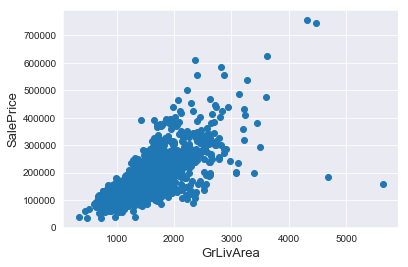

In [33]:
fig,ax=plt.subplots()
ax.scatter(x=train["GrLivArea"],y=train["SalePrice"])
plt.xlabel("GrLivArea",fontsize=13)
plt.ylabel("SalePrice",fontsize=13)
plt.show()

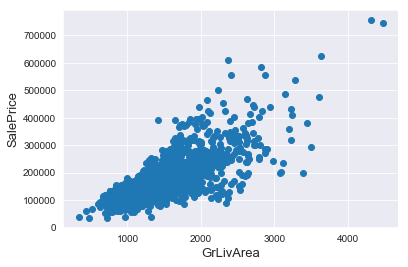

In [34]:
train=train.drop(train[(train["GrLivArea"]>4000) & (train["SalePrice"]<300000)].index) # delete outliers

fig,ax=plt.subplots()
ax.scatter(x=train["GrLivArea"],y=train["SalePrice"])
plt.xlabel("GrLivArea",fontsize=13)
plt.ylabel("SalePrice",fontsize=13)
plt.show()

<h4> Target Variable 

SalePrice is the variable we need to predict. 

From the plot, SalePrice is right-skewed.


 mu=180932.92 and sigma=79467.79



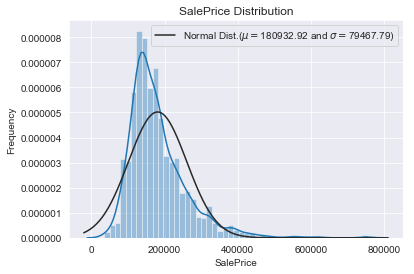

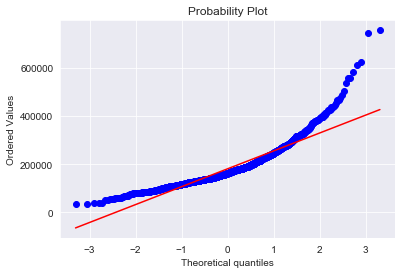

In [35]:
sns.distplot(train["SalePrice"],fit=norm)

# get the fitted params used by the function
(mu,sigma)=norm.fit(train["SalePrice"])
print("\n mu={:.2f} and sigma={:.2f}\n".format(mu,sigma))

# plot the distribution 
plt.legend(["Normal Dist.($\mu=${:.2f} and $\sigma=${:.2f})".format(mu,sigma)],loc="best")
plt.ylabel("Frequency")
plt.title("SalePrice Distribution")

fig=plt.figure()
res=stats.probplot(train["SalePrice"],plot=plt)
plt.show()

log-transformation of the target variable


 mu=2.57 and sigma=0.03



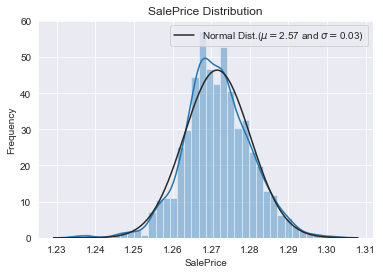

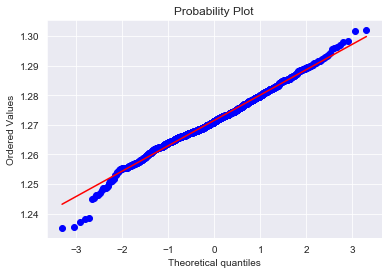

In [29]:
train["SalePrice"]=np.log1p(train["SalePrice"])

sns.distplot(train["SalePrice"],fit=norm)
print("\n mu={:.2f} and sigma={:.2f}\n".format(mu,sigma))

plt.legend(["Normal Dist.($\mu=${:.2f} and $\sigma=${:.2f})".format(mu,sigma)],loc="best")
plt.ylabel("Frequency")
plt.title("SalePrice Distribution")

fig=plt.figure()
res=stats.probplot(train["SalePrice"],plot=plt)
plt.show()

<h4> Feature Engineering

In [36]:
# concatenate the train and test dataset in the same dataframe
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice.values
all_data=pd.concat([train,test]).reset_index(drop=True)
all_data.drop(["SalePrice"],axis=1,inplace=True)
print("all data size is:{}".format(all_data.shape))

all data size is:(2917, 79)


Missing data

In [37]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100 # calculate missing ratio=number of missing values/length of feature
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
missing_data=pd.DataFrame({"Missing Ratio":all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


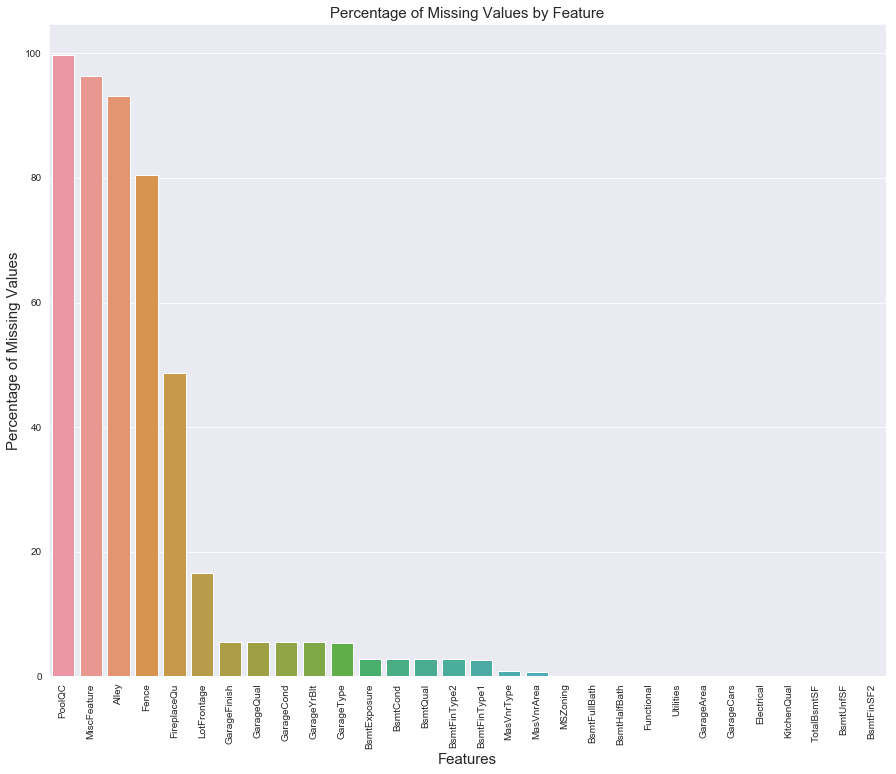

In [38]:
f,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation="90")
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Percentage of Missing Values",fontsize=15)
plt.title("Percentage of Missing Values by Feature",fontsize=15)
plt.show()

<h4> Data Correlation

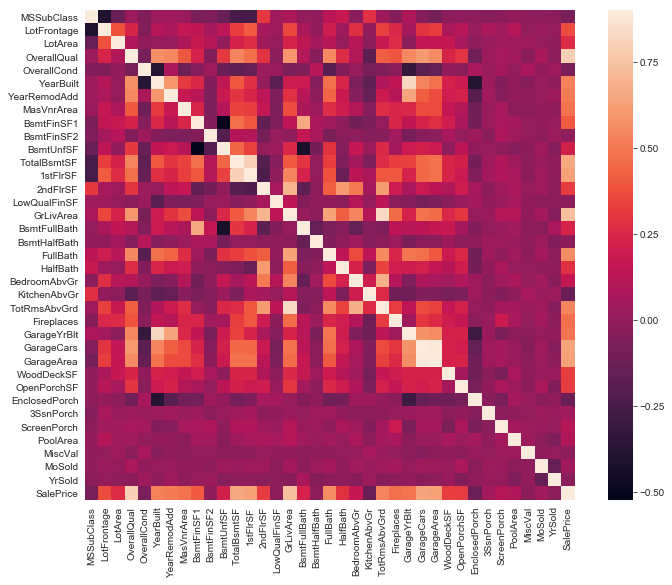

In [39]:
corrmat=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True)

<h4> Imputing Missing Values

In [40]:
# PoolQC: 
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")
# MiscFeature:
all_data["MiscFeature"]=all_data["MiscFeature"].fillna("None")
# Alley
all_data["Alley"]=all_data["Alley"].fillna("None")
# Fence
all_data["Fence"]=all_data["Fence"].fillna("None")
# FireplaceQU
all_data["FireplaceQu"]=all_data["FireplaceQu"].fillna("None")
# LotFrontage
all_data["LotFrontage"]=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
#
for col in ("GarageType","GarageFinish","GarageQual","GarageCond"):
    all_data[col]=all_data[col].fillna("None")
#
for col in ("GarageYrBlt","GarageArea","GarageCars"):
    all_data[col]=all_data[col].fillna(0)
#
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF''TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    all_data[col]=all_data[col].fillna(0)
#
